# Классы

Класс — тип, опрределённый программистом. Может предоставлять наружу поля (переменные специального вида) и методы (функции специального вида). Попробуем определить класс — тело, у которого есть две координаты и скорость по двум направлениям.

Для того, чтобы создать поле, достаточно ему что-то присовить. В питоне это можно сделать в любой момент, в том числе и «снаружи» от объекта. Но лучше инициализировать поля специальным методом — конструктором. В Питоне конструктор имеет имя `__init__`. У методов, за исключением статических, есть параметр `self`, находящийся в списке параметров первым. Если мы вызываем метод объекта, как `obj.meth(1,2,3)`, то, включая `self`, метод `meth` получит параметры `obj, 1, 2, 3`. Посмотрите, как `__init__` присваивает полям объекта `self` значения своих аргументов.

Также поля можно использовать и изменять, как в методе `advance`.

In [1]:
import math

MODEL_G = 9.81
MODEL_DT = 0.001

class Body:
    def __init__(self, x, y, vx, vy):
        """
        Создать тело.
        
        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        vx: float
            горизонтальная скорость
        vy: float
            вертикальная скорость
        """

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
        self.trajectory_x = []
        self.trajectory_y = []
        

    def advance(self):
        """
        Выполнить шаг мат. модели применительно к телу, предварительно записав его координаты
        """
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        
        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT

# Наследование

![](img/oop.jpg)

Основные принципы \[основанного на классах\] объектно-ориентированного программирования:

* **Инкапсуляция** — сокрытие деталей реализации за простым интерфейсом. Мы уже сделали это в конструкторе и методе `advance`.
* **Наследование** — создание иерархии от общего к частному. Например, физическое тело — это очень много что, но мы мало знаем о свойствах тела в принципе. Зато если у нас есть, скажем, ёжик, ракета и котлета, то их гораздо меньше, чем просто тел, но зато, опираясь на знания об их сущности, с ними миожно уже делать более интересные вещи.
* **Полиморфизм** — можно сказать, что это инкапсуляция применительно к наследованию. Например, у ёжика и у ракеты могут быть методы наподобие `отправиться_в_полёт`. При этом ёжик и ракета делают это по-разному, но если мы хотим отправлть в полёт физическое тело вообще, то хорошо бы, чтобы можно было так и написать `объект.отправиться_в_полёт()`. При этом *реализации* этого метода будут у всех разные, и они сами будут разбираться в том, как им следует летать.

В общем, давайте сделаем ракету, например, «Катюшу», которая будет на первых этапах полёта разгоняться и терять в массе. А метод `advance` будет это учитывать.

In [2]:
class Rocket(Body):
    def __init__(self, x, y):
        """
        Создать ракету.
        
        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        """
        super().__init__(x, y, 10, 10) # Вызовем конструктор предка — тела, т.к. он для ракеты актуален
        pass # Дописать

    def advance(self):
        super().advance() # вызовем метод предка — тела, т.к. и он для ракеты актуален.
        pass # Дописать

# Домашнее задание

Наша ракета здесь — не очень-то и ракета. Требуется дописать её `__init__` и `__advance__` так, чтобы:

* Она летела, ускоряясь и теряя в массе, пока не прогорит порох, а потом летела, как тело
* М.б. ещё что-нибудь нафантазировать про неё =)

In [3]:
import numpy as np

np.sin

b = Body(0, 0, 9, 9)
r = Rocket(0, 0)

bodies = [b, r]
# Дальше мы уже не будем думать, кто тут ёжик, кто ракета, а кто котлета —
# благодаря возможностям ООП будем просто работать со списком тел

for t in np.r_[0:2:MODEL_DT]: # для всех временных отрезков
    for b in bodies: # для всех тел
        b.advance() # выполним шаг

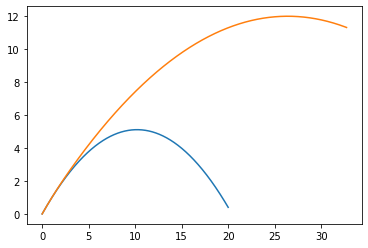

In [74]:
%matplotlib inline
from matplotlib import pyplot as pp

for b in bodies: # для всех тел
    pp.plot(b.trajectory_x, b.trajectory_y) # нарисуем их траектории